In [107]:
# Here is the code to load the data
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [108]:
import warnings
warnings.filterwarnings( 'ignore' )

In [109]:
bos


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [110]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    float64
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    float64
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [111]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [112]:
bos.columns = boston.feature_names
print(bos.head())
#print(boston.target.shape)

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [113]:
bos['PRICE'] = boston.target
print(bos.head())
print(bos.describe())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.0000

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
# Calculate and show pairplot
#sns.pairplot(bos, size=5)
#plt.tight_layout()
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

<AxesSubplot:xlabel='LSTAT', ylabel='PRICE'>

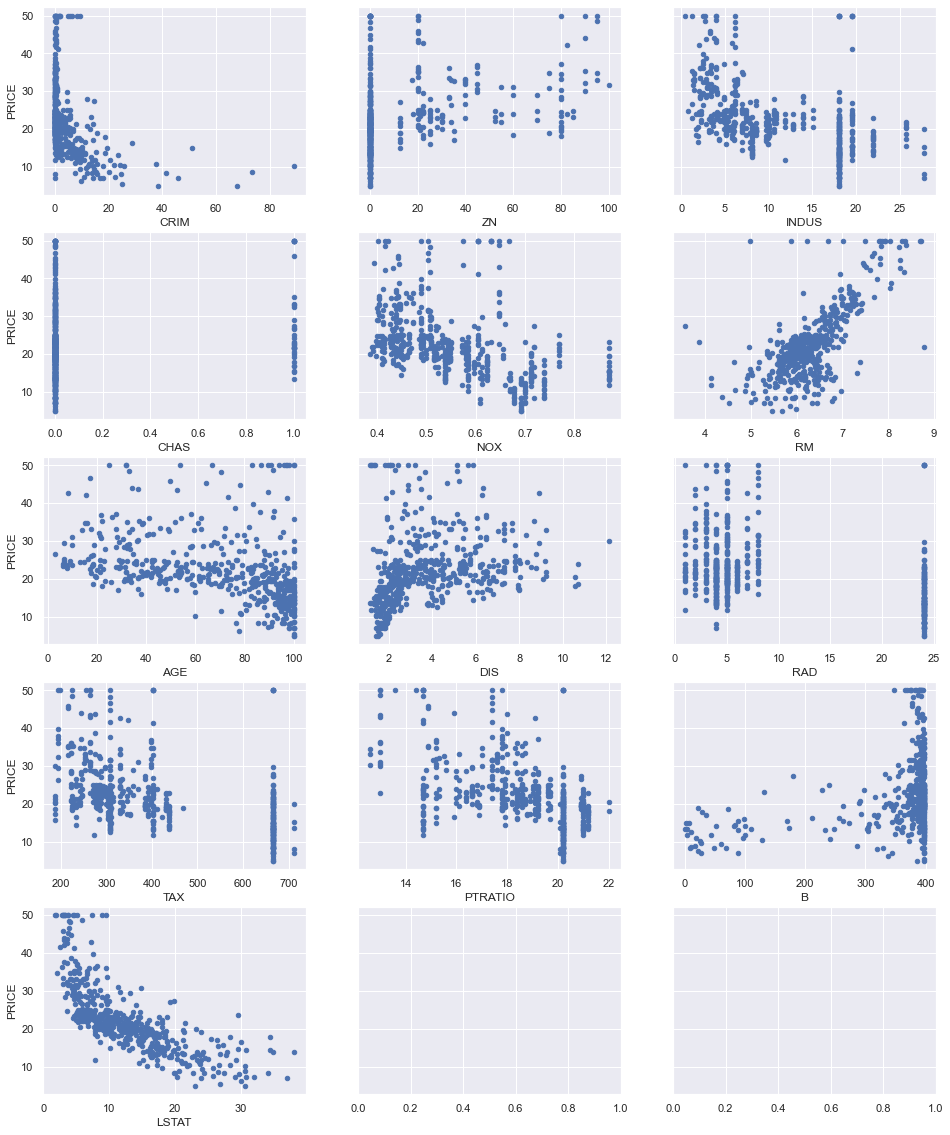

In [133]:
fig, axs = plt.subplots(5, 3, sharey=True)
bos.plot(kind='scatter', x='CRIM', y='PRICE', ax=axs[0,0], figsize=(16, 20))
bos.plot(kind='scatter', x='ZN', y='PRICE', ax=axs[0,1])
bos.plot(kind='scatter', x='INDUS', y='PRICE', ax=axs[0,2])
bos.plot(kind='scatter', x='CHAS', y='PRICE', ax=axs[1,0])
bos.plot(kind='scatter', x='NOX', y='PRICE', ax=axs[1,1])
bos.plot(kind='scatter', x='RM', y='PRICE', ax=axs[1,2])
bos.plot(kind='scatter', x='AGE', y='PRICE', ax=axs[2,0])
bos.plot(kind='scatter', x='DIS', y='PRICE', ax=axs[2,1])
bos.plot(kind='scatter', x='RAD', y='PRICE', ax=axs[2,2])
bos.plot(kind='scatter', x='TAX', y='PRICE', ax=axs[3,0])
bos.plot(kind='scatter', x='PTRATIO', y='PRICE', ax=axs[3,1])
bos.plot(kind='scatter', x='B', y='PRICE', ax=axs[3,2])
bos.plot(kind='scatter', x='LSTAT', y='PRICE', ax=axs[4,0])

In [135]:
#import matplotlib.pyplot as plt

# load sample data
#df = sns.load_dataset('bos')

# setup figure
#fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(12, 10))

# iterate and plot subplots
#for xcol, ax in zip(bos.columns[1:-1], [x for v in axes for x in v]):
    #bos.plot.scatter(x=xcol, y='PRICE', ax=ax, alpha=0.5, color='b')

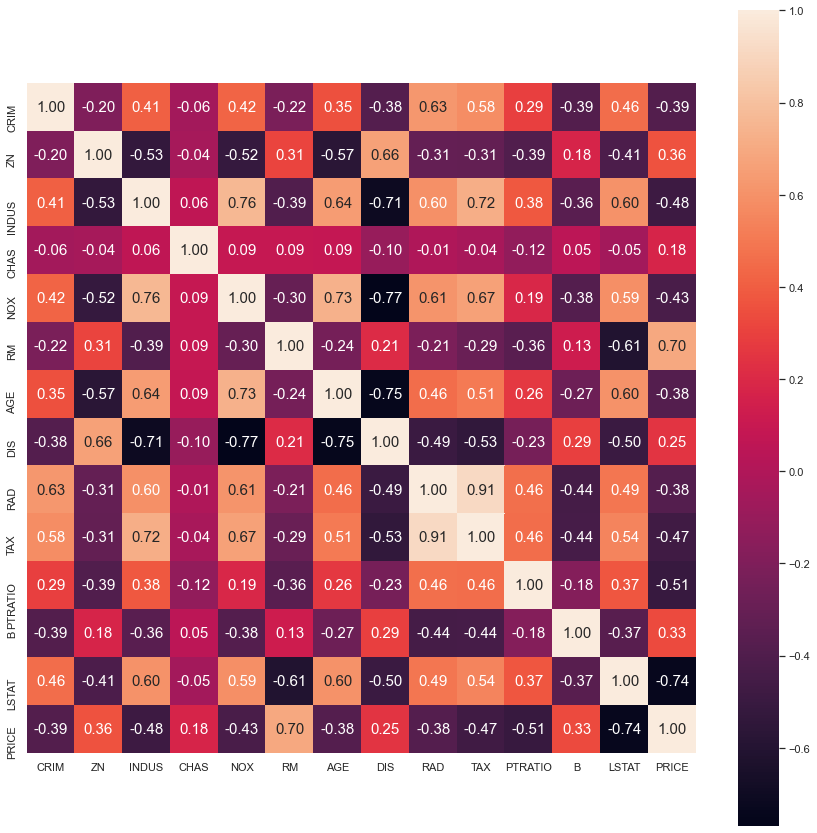

In [136]:
# Calculate and show correlation matrix
cm = np.corrcoef(bos.values.T)
sns.set(rc = {'figure.figsize':(15,15)})
sns.set(font_scale=1)
hm = sns.heatmap(cm,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size': 15},
                yticklabels=bos.columns,
                xticklabels=bos.columns)


In [166]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
scaler =StandardScaler()
y=bos['PRICE']
X=bos.drop(columns = ['PRICE'])
X_scaled = scaler.fit_transform(X)

In [167]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result


#vif["Features"] = 
col=bos.columns[0:13]
vif["Features"] = col

In [168]:
vif


,VIF,Features
0,1.792192,CRIM
1,2.298758,ZN
2,3.991596,INDUS
3,1.073995,CHAS
4,4.393720,NOX
5,1.933744,RM
6,3.100826,AGE
7,3.955945,DIS
8,7.484496,RAD
9,9.008554,TAX


In [169]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state=355)

In [207]:
x_test

array([[-0.40296135, -0.48772236,  2.42256516, ...,  0.76033959,
         0.42120644,  0.75791078],
       [-0.38264608, -0.48772236,  1.56899549, ...,  1.26893833,
         0.44105193,  0.38364678],
       [-0.41247486,  1.4436582 , -1.12303194, ..., -1.50523663,
         0.3622182 , -1.1162127 ],
       ...,
       [-0.41613247,  2.94584308, -1.40317788, ..., -2.70737911,
         0.38951945, -0.8456773 ],
       [ 7.48364564, -0.48772236,  1.01599907, ...,  0.80657583,
         0.31024714,  1.4475658 ],
       [-0.41379104, -0.48772236, -1.2660231 , ..., -0.30309415,
         0.44105193, -1.06715188]])

In [172]:
regression = LinearRegression()

regression.fit(x_train,y_train)

LinearRegression()

In [174]:
# saving the model to the local file system
import pickle
filename = 'finalized_model.pickle'
pickle.dump(regression, open(filename, 'wb'))

In [175]:
loaded_model = pickle.load(open(filename, 'rb'))
a=loaded_model.predict(scaler.transform([[0.027,1,5.07,0,.486,7,61,6,3,22,18,386,5]]))
a

array([29.53350657])

In [210]:
regression.score(x_train,y_train)
bos


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [218]:
X_new = pd.DataFrame({'CRIM': [bos.CRIM.min(), bos.CRIM.max()]})
X_new['ZN'] = pd.DataFrame({'ZN': [bos.ZN.min(), bos.ZN.max()]})
X_new['INDUS'] = pd.DataFrame({'INDUS': [bos.INDUS.min(), bos.INDUS.max()]})
X_new['CHAS'] = pd.DataFrame({'CHAS': [bos.CHAS.min(), bos.CHAS.max()]})
X_new['NOX'] = pd.DataFrame({'NOX': [bos.NOX.min(), bos.NOX.max()]})
X_new['RM'] = pd.DataFrame({'RM': [bos.RM.min(), bos.RM.max()]})
X_new['AGE'] = pd.DataFrame({'AGE': [bos.AGE.min(), bos.AGE.max()]})
X_new['DIS'] = pd.DataFrame({'DIS': [bos.DIS.min(), bos.DIS.max()]})
X_new['RAD'] = pd.DataFrame({'RAD': [bos.RAD.min(), bos.RAD.max()]})
X_new['TAX'] = pd.DataFrame({'TAX': [bos.TAX.min(), bos.TAX.max()]})
X_new['PTRATIO'] = pd.DataFrame({'PTRATIO': [bos.PTRATIO.min(), bos.PTRATIO.max()]})
X_new['B'] = pd.DataFrame({'B': [bos.B.min(), bos.B.max()]})
X_new['LSTAT'] = pd.DataFrame({'LSTAT': [bos.LSTAT.min(), bos.LSTAT.max()]})

X_new


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,0.0,0.46,0.0,0.385,3.561,2.9,1.1296,1.0,187.0,12.6,0.32,1.73
1,88.97620,100.0,27.74,1.0,0.871,8.780,100.0,12.1265,24.0,711.0,22.0,396.90,37.97


In [220]:
predcts = regression.predict(X_new)
predcts

array([ -339.03868361, -1061.32698509])

Text(0.5, 1.0, 'Prices vs Predicted prices: Y vs Y1')

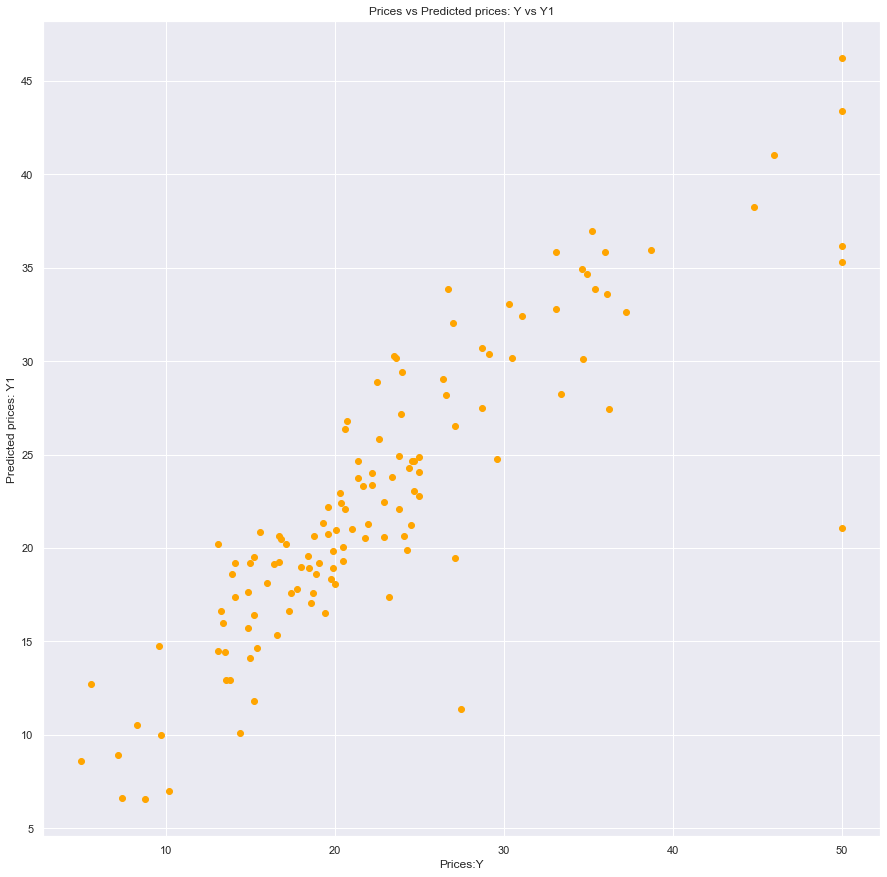

In [224]:
y_pred = regression.predict(x_test)
plt.scatter(y_test, y_pred, color ="Orange")
plt.xlabel("Prices:Y")
plt.ylabel("Predicted prices: Y1")
plt.title("Prices vs Predicted prices: Y vs Y1")
#plt.plot(X_new, predcts, c='red', linewidth=2)

In [178]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [179]:
adj_r2(x_train,y_train)

0.7210541557516514

In [180]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [181]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

0.00033837642965584014

In [182]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.00033837642965584014)

In [183]:
lasso_reg.score(x_test, y_test)

0.7518957038694827

In [185]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([4.39267479, 2.19107185, 6.67482984, 0.5193872 , 5.93540444,
       5.94529793, 9.16907376, 9.51036288, 3.18555131, 2.80808929,
       3.07556356, 4.87122985, 9.06640784, 8.03774411, 3.63387214,
       9.75205424, 7.67957669, 1.40766115, 3.42524933, 9.00166732,
       2.19433564, 2.24494705, 7.18639373, 1.64526387, 4.33957088,
       3.50586748, 9.28243659, 5.77431759, 2.01675074, 0.21622827,
       5.56487474, 0.70947022, 3.4263575 , 5.25275078, 2.42524603,
       1.54768074, 9.44417791, 4.71790784, 8.16698096, 1.64398308,
       0.62144547, 9.3549369 , 9.83503312, 3.68628941, 1.41954103,
       0.01581422, 1.60023236, 5.00930111, 2.3941717 , 0.01293817]),
        cv=10, normalize=True)

In [186]:
ridgecv.alpha_

0.015814219339048696

In [188]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.015814219339048696)

In [189]:
ridge_model.score(x_test, y_test)

0.7518945492912865

In [190]:
# Elastic net

elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(x_train, y_train)

ElasticNetCV(cv=10)

In [191]:
elasticCV.alpha_

0.013238147250836645

In [192]:
# l1_ration gives how close the model is to L1 regularization, below value indicates we are giving equal
#preference to L1 and L2
elasticCV.l1_ratio

0.5

In [193]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.013238147250836645)

In [194]:
elasticnet_reg.score(x_test, y_test)

0.7503011494807524